# Import Libraries & Images

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [18]:
img = cv2.imread("C:\\Users\\limzh\\OneDrive\\Pictures\\white crystal beach.JPG") # test image
img_plot = Image.open("C:\\Users\\limzh\\OneDrive\\Pictures\\white crystal beach.JPG")

# Storing Color Data & Setting Up Percentage Function

In [21]:
# COLOR CHART
black = ['impervious road', 0, 0, 0]
maroon = ['impervious non-road', 115, 0 ,0]
pink = ['fractional turf', 255, 190, 232]
orange = ['cropland/pasture', 230, 152, 0]
purple = ['fractional impervious', 197, 0, 255]
mint = ['tidal wetland', 0,255,197]
dark_mint = ['floodplain wetland',0,230,168]
green = ['forest', 38, 115, 0]
brown = ['mixed open', 168, 112, 1]
light_green = ['tree cover over turf', 170, 255, 1]
neon_green = ['tree cover over impervious', 85, 255, 0]
blue = ['water', 0, 113, 254]
color_array = [black, maroon, pink, orange, purple, mint, dark_mint, green, brown, light_green, neon_green, blue]

In [24]:
diff = 15 # account for color grading differentials in color map

def find_land_use_percentage(image):
    percentage_dict = {}
    for color in color_array:
        boundaries = [([color[3]-diff, color[2]-diff, color[1]-diff],[color[3]+diff, color[2]+diff, color[1]+diff])]
        for (lower, upper) in boundaries:
            lower_arr = np.array(lower)
            upper_arr = np.array(upper)
            present = cv2.inRange(image, lower_arr, upper_arr)
            ratio_color = cv2.countNonZero(present)/(image.size/3)
            percentage_dict.update({color[0]: ratio_color})
            start_string = color[0] + " pixel percentage: "
            print(start_string, np.round(ratio_color*100, 2))
    percentage_dict = sorted(percentage_dict.items(), key=lambda x: x[1], reverse=True)
    print(percentage_dict)

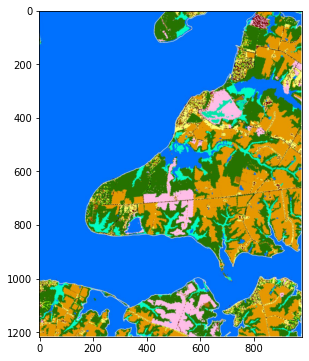

In [30]:
plt.figure(figsize = (20,6))
plt.imshow(img_plot)

## Polygon-ization

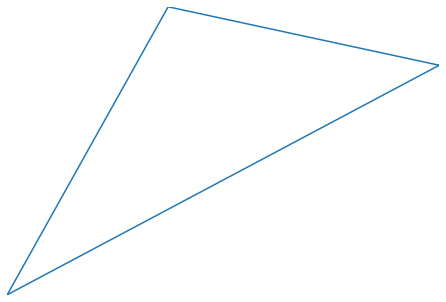

In [31]:
# Just a polygon test
coor_test = [[76.54488, 38.75465],
       [76.38694, 38.85222], [76.29316999999998, 38.3715]]
coor_test.append(coor_test[0])
xs_test, ys_test = zip(*coor_test)
plt.figure()
plt.plot(xs_test, ys_test)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("test_poly_trimmed.jpg", bbox_inches = 'tight',
    pad_inches = 0)

# Segment Map, Save Individual Polygons, Parse through Function

In [ ]:
# Overlay boundary data onto land use map (TO-DO)

In [29]:
# Store point and boundary points in dictionary 

# Look through dictionary and find appropriate boundaries and make OpenCv mask crops
height = img.shape[0] # img refers to macro screenshot of entire bay - we will crop out polygons from this
width = img.shape[1]

mask = np.zeros((height, width), dtype=np.uint8)
points = np.array([[]]) # this list will contain the points on the boundaries of each polygon, to be filled
cv2.fillPoly(mask, points, (255))

res = cv2.bitwise_and(img,img,mask = mask)

rect = cv2.boundingRect(points) # boundary points of polygon - orig size
cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]] # cropped image of polygon

In [ ]:
# Save cropped polygon as an image
cv2.imwrite('saved_crop.jpg', cropped)

# After converting mask crops to images, run through land use processor
crop_img = cv2.imread('saved_crop.jpg')
find_land_use_percentage(crop_img)